<a href="https://colab.research.google.com/github/OjasTamhankar/Machine-Learning-Lab/blob/main/Experiment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode labels (since there are 3 classes)
lb = LabelBinarizer()
y = lb.fit_transform(y)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 120
Testing samples: 30


In [4]:
# Single-layer neural network (output = 3 neurons for 3 classes)
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))  # 4 features, 3 output classes

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.1),
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3348 - loss: 1.1822
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7327 - loss: 0.5710 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8493 - loss: 0.4516
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8336 - loss: 0.4030
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8444 - loss: 0.3956 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8794 - loss: 0.3278
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8870 - loss: 0.3554
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8625 - loss: 0.3682
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8946 - loss: 0.3042
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8971 - loss: 0.3048
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9001 - loss: 0.2833  
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc

In [6]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Test Accuracy: 96.67%


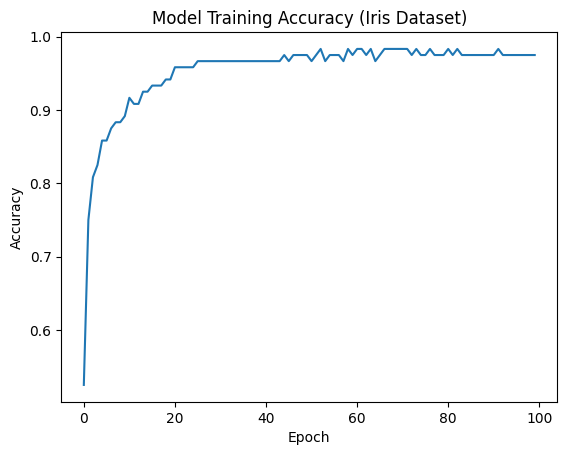

In [8]:
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy (Iris Dataset)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
